<a href="https://colab.research.google.com/github/facundograpsas/machine-learning/blob/main/Covid_argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("drive/My Drive/Covid Argentina/Covid19Casos2.csv", encoding="utf-16")

In [ ]:
data.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,Clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,672064,M,52.0,Años,Argentina,Buenos Aires,Florencio Varela,Buenos Aires,2020-05-29,NaN,44,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,274,2020-06-22
1,717629,F,46.0,Años,Argentina,Buenos Aires,Pergamino,Buenos Aires,2020-01-29,2020-01-31,5,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,NaN,623,2020-06-22
2,717926,F,41.0,Años,Argentina,CABA,COMUNA 12,CABA,2020-01-23,2020-01-31,5,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Invalidado Epidemiologicamente,Descartado,2,NaN,12,2020-06-22
3,718029,F,52.0,Años,Argentina,Buenos Aires,La Plata,Buenos Aires,2020-01-29,2020-01-31,5,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Invalidado Epidemiologicamente,Descartado,6,NaN,441,2020-06-22
4,718055,F,34.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-01-16,2020-01-31,5,NaN,NO,NaN,NO,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-02-11,0,2020-06-22


Text(0.5, 0, 'Edad')

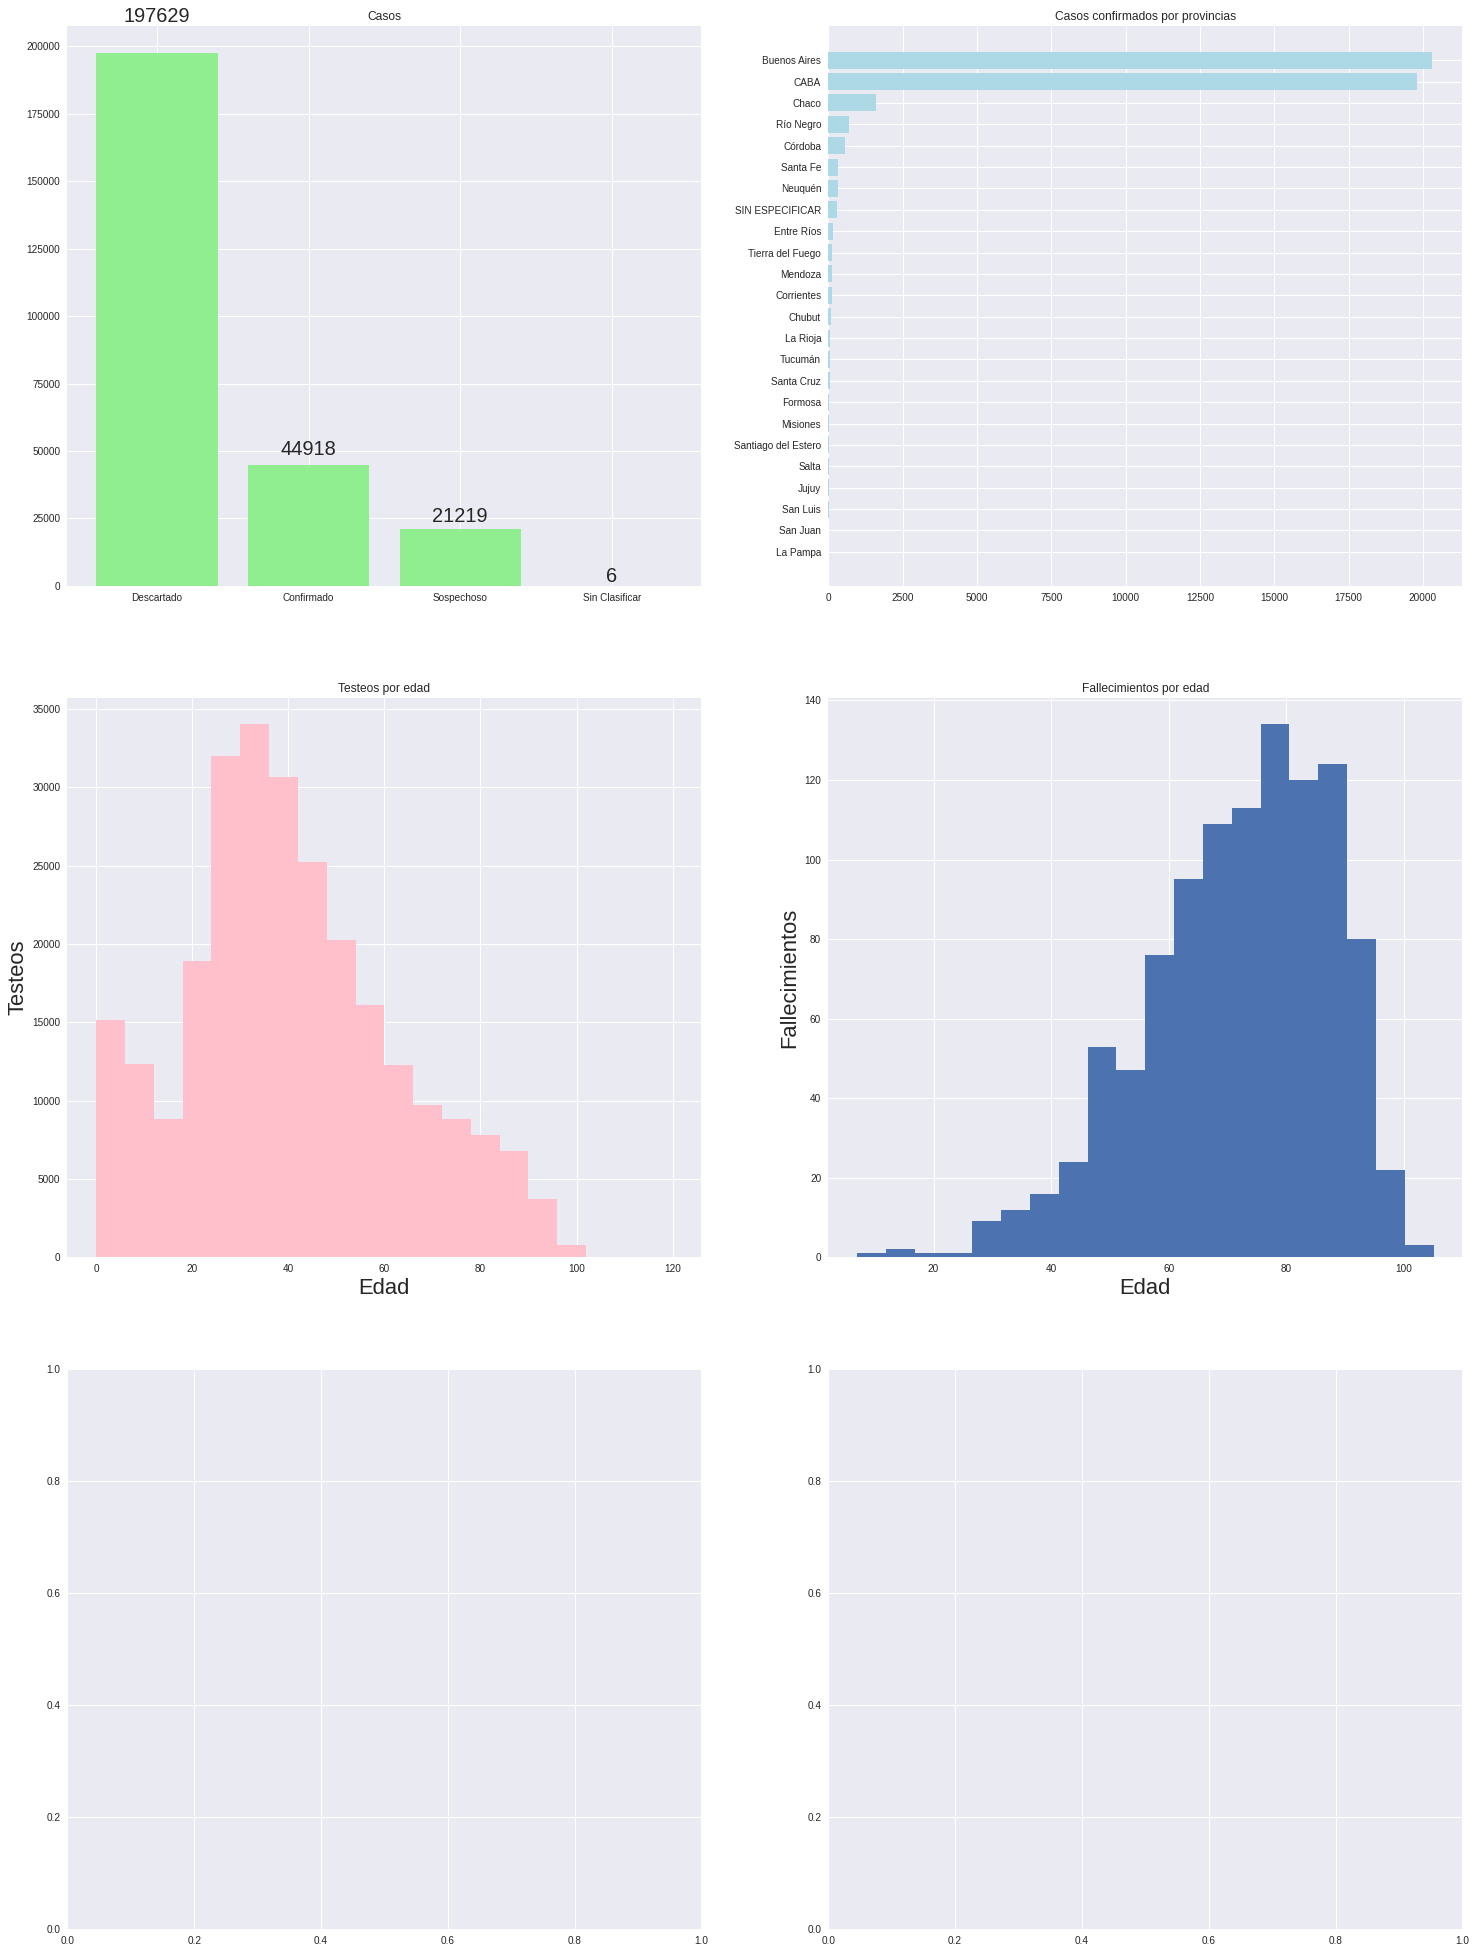

In [ ]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=20)
        
      
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(25,35))
plt.style.use('seaborn')

casos = ax1.bar(data["clasificacion_resumen"].value_counts().index,
              data["clasificacion_resumen"].value_counts(), color="Lightgreen")
autolabel(casos)
ax1.set_title("Casos")


confirmados = data[data["clasificacion_resumen"] == "Confirmado"]

casos_por_provincia = ax2.barh(confirmados["residencia_provincia_nombre"].value_counts(ascending=True).index, 
                               confirmados["residencia_provincia_nombre"].value_counts(ascending=True),color="lightblue")
ax2.set_title("Casos confirmados por provincias")

sexo = data["sexo"]

edad = data[["edad", "Clasificacion"]]

casos_por_edad = ax3.hist(data["edad"].value_counts().index,
                          weights=data["edad"].value_counts(),
                          color="pink", bins=20)
ax3.set_title("Testeos por edad")
ax3.set_ylabel("Testeos")
ax3.set_xlabel("Edad")


fallecimientos_edad = edad[edad["Clasificacion"] == "Caso confirmado - Fallecido"]

asd = ax4.hist(fallecimientos_edad["edad"].value_counts().index, weights = fallecimientos_edad["edad"].value_counts(), bins=20);
ax4.set_title("Fallecimientos por edad")
ax4.set_ylabel("Fallecimientos")
ax4.set_xlabel("Edad")


In [ ]:
estado_salud = data[["cuidado_intensivo","asistencia_respiratoria_mecanica","fallecido"]]

In [ ]:
estado_salud.head()

,cuidado_intensivo,asistencia_respiratoria_mecanica,fallecido
0,NO,NO,NO
1,NO,NO,NO
2,NO,NO,NO
3,NO,NO,NO
4,NO,NO,NO


In [ ]:
#@title
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(estado_salud["cuidado_intensivo"])
estado_salud["cuidado_intensivo"] = le.transform(estado_salud["cuidado_intensivo"])
le.fit(estado_salud["asistencia_respiratoria_mecanica"])
estado_salud["asistencia_respiratoria_mecanica"] = le.transform(estado_salud["asistencia_respiratoria_mecanica"])
le.fit(estado_salud["fallecido"])
estado_salud["fallecido"] = le.transform(estado_salud["fallecido"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
estado_salud.head()

,cuidado_intensivo,asistencia_respiratoria_mecanica,fallecido
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
estado_salud.sum()

cuidado_intensivo                   9090
asistencia_respiratoria_mecanica    3455
fallecido                           2790
dtype: int64

In [ ]:
estado_salud[estado_salud["fallecido"] == 1]["cuidado_intensivo"].sum()

1208

In [ ]:
data["Clasificacion"].value_counts()

Caso Descartado                                                        196799
Caso confirmado - Activo                                                24093
Caso sospechoso - Con muestra sin resultado                             15066
Caso confirmado - Activo Internado                                      11776
Caso Sospechoso - Sin muestra                                            5622
Caso confirmado - No Activo por criterio de laboratorio                  3367
Caso confirmado - No activo (por laboratorio y tiempo de evolución)      2432
Caso confirmado - No activo (por tiempo de evolución)                    2171
Caso confirmado - Fallecido                                              1043
Caso Invalidado Epidemiologicamente                                       640
Caso Sospechoso - Muestra no apta                                         531
Otro diagnostico                                                          190
Caso confirmado - Activo con seguimiento negativo               

In [ ]:
clasificacion = data["Clasificacion"].value_counts()

In [ ]:
confirmados = clasificacion[["Caso confirmado - Fallecido"]]

In [ ]:
edad = data[["edad", "Clasificacion"]]

In [ ]:
edad[edad["Clasificacion"] == "Caso Sospechoso - Muestra no apta"]

,edad,Clasificacion
82,65.0,Caso confirmado - Fallecido
231,68.0,Caso confirmado - Fallecido
243,62.0,Caso confirmado - Fallecido
453,71.0,Caso confirmado - Fallecido
546,64.0,Caso confirmado - Fallecido
...,...,...
248695,68.0,Caso confirmado - Fallecido
248888,96.0,Caso confirmado - Fallecido
249395,77.0,Caso confirmado - Fallecido
253333,73.0,Caso confirmado - Fallecido


In [ ]:
fallecimientos_edad = edad[edad["Clasificacion"] == "Caso confirmado - Fallecido"]


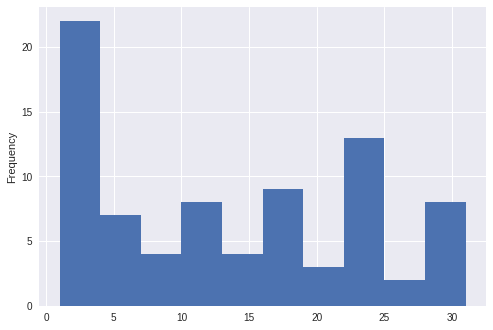

In [ ]:
fallecimientos_edad["edad"].value_counts(ascending=False).plot(kind="hist")

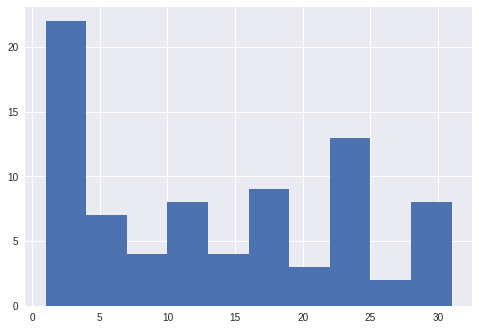

In [ ]:
fallecimientos_edad["edad"].value_counts().hist()

## Informe y análisis COVID-19 Argentina 6/20 al día de la fecha.

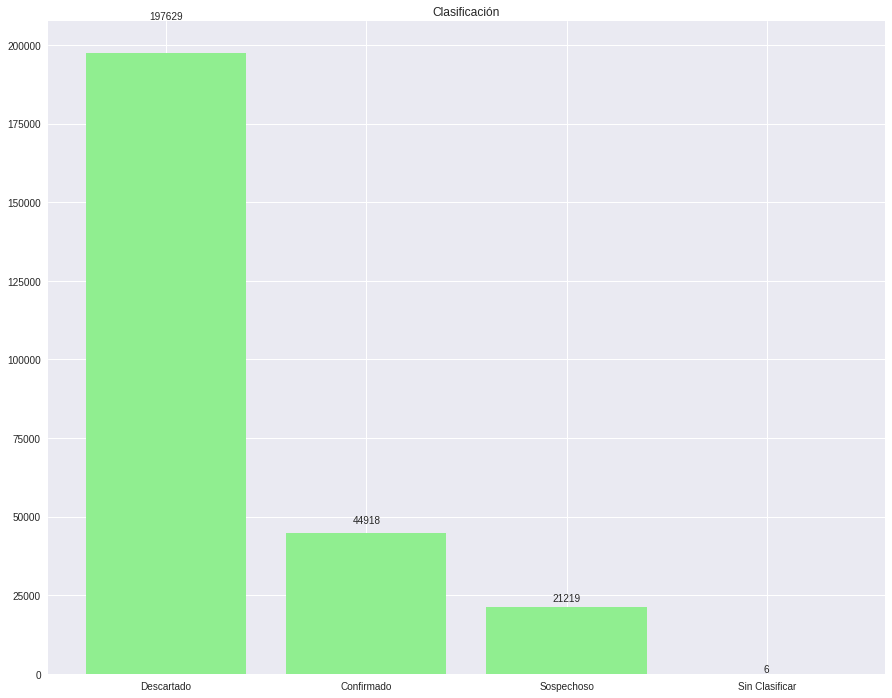

In [ ]:
#@title
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


fig, ax1 = plt.subplots(figsize=(15,12))
casos = ax1.bar(data["clasificacion_resumen"].value_counts().index, data["clasificacion_resumen"].value_counts(), color="lightgreen")
ax1.set_title("Clasificación")
autolabel(casos)



Casos:
* Descartados: 197629
* Confirmados: 44918
* Sospechosos: 21219
* Sin clasificar: 6

In [ ]:
data["Clasificacion"].value_counts()

Caso Descartado                                                        196799
Caso confirmado - Activo                                                24093
Caso sospechoso - Con muestra sin resultado                             15066
Caso confirmado - Activo Internado                                      11776
Caso Sospechoso - Sin muestra                                            5622
Caso confirmado - No Activo por criterio de laboratorio                  3367
Caso confirmado - No activo (por laboratorio y tiempo de evolución)      2432
Caso confirmado - No activo (por tiempo de evolución)                    2171
Caso confirmado - Fallecido                                              1043
Caso Invalidado Epidemiologicamente                                       640
Caso Sospechoso - Muestra no apta                                         531
Otro diagnostico                                                          190
Caso confirmado - Activo con seguimiento negativo               

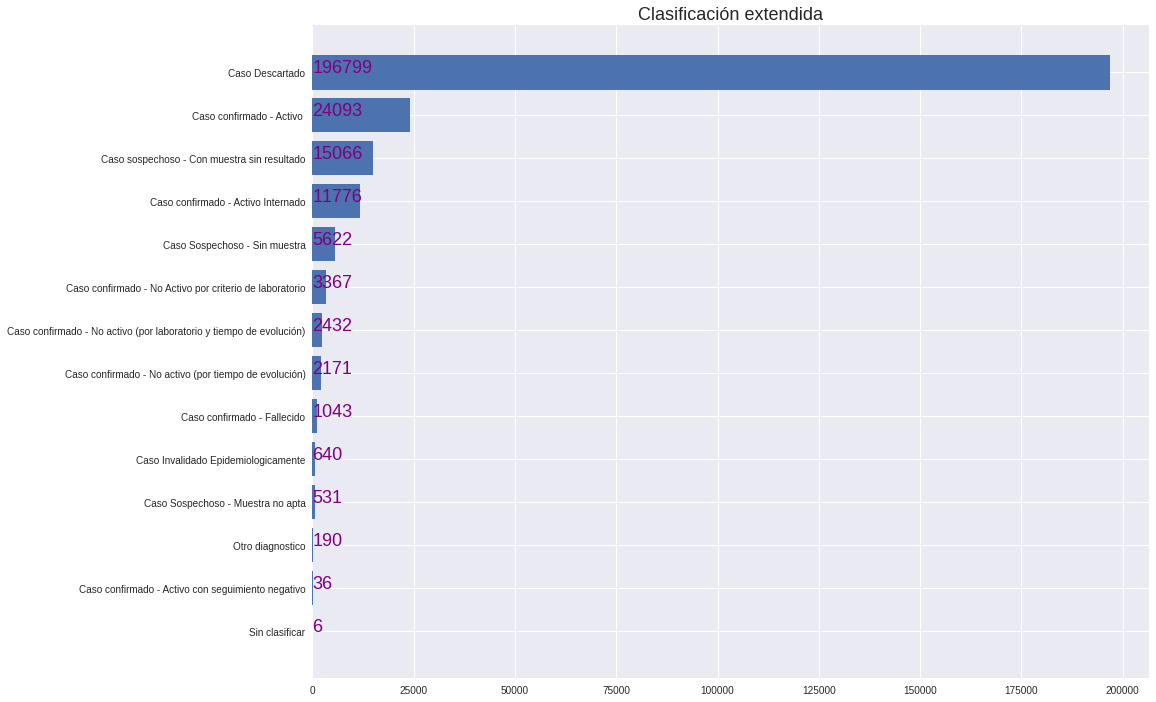

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,12))
casos_extendido = ax1.barh(data["Clasificacion"].value_counts(ascending=True).index, data["Clasificacion"].value_counts(ascending=True));
ax1.set_title("Clasificación extendida", fontsize=18)
for i in range(14):
  ax1.text(1,i,data["Clasificacion"].value_counts()[13-i], fontsize=18, color="purple")
plt.rcParams["axes.labelsize"] = 22


In [ ]:
data["Clasificacion"].value_counts()[0]

196799

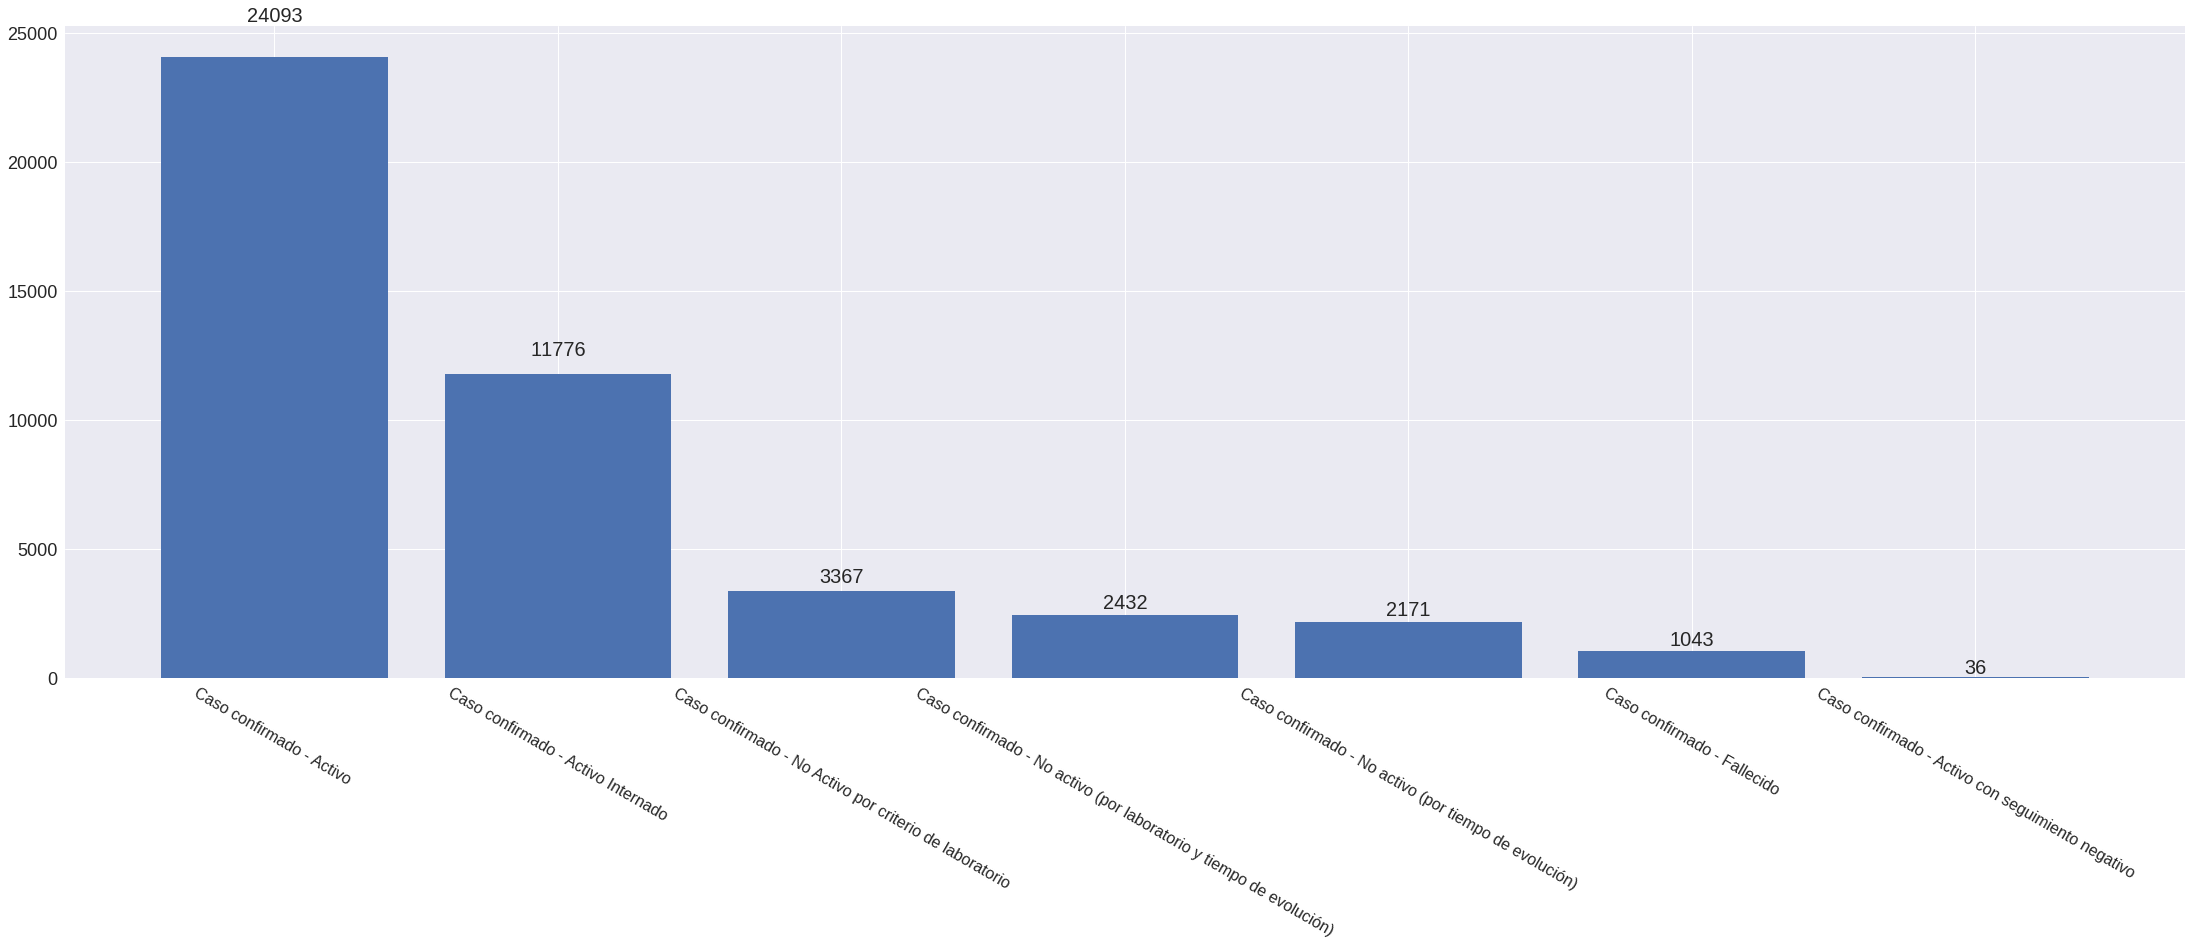

In [ ]:
fig,ax1 = plt.subplots(figsize=(38,12))
clasificacion_confirmados = ax1.bar(confirmados["Clasificacion"].value_counts().index, confirmados["Clasificacion"].value_counts())
autolabel(clasificacion_confirmados)
plt.xticks(fontsize=16, rotation=-30)
plt.yticks(fontsize=18);

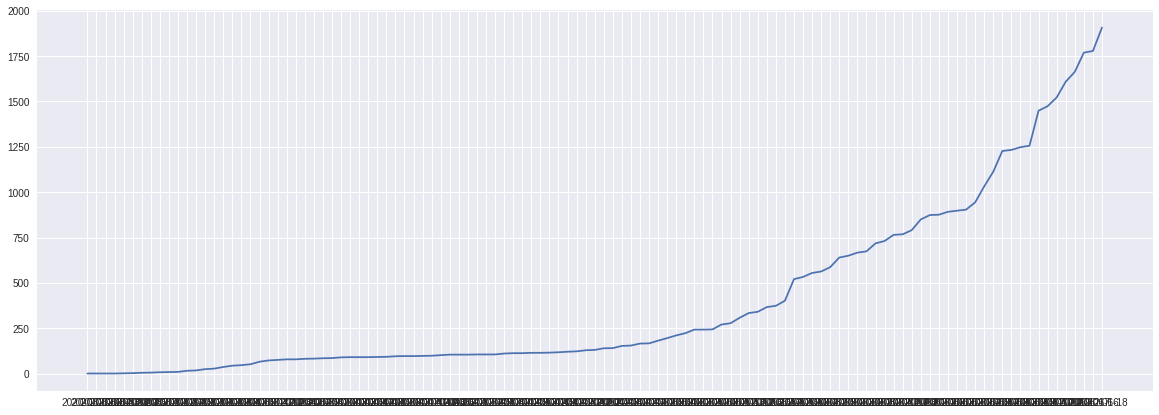

In [ ]:
confirmados["fecha_apertura"].value_counts()
fig, ax = plt.subplots(figsize=(20,7))

ax.plot(confirmados["fecha_apertura"].value_counts(ascending=True))

In [ ]:
data.dtypes

id_evento_caso                        int64
sexo                                 object
edad                                float64
edad_años_meses                      object
residencia_pais_nombre               object
residencia_provincia_nombre          object
residencia_departamento_nombre       object
carga_provincia_nombre               object
fecha_inicio_sintomas                object
fecha_apertura                       object
sepi_apertura                         int64
fecha_internacion                    object
cuidado_intensivo                    object
fecha_cui_intensivo                  object
fallecido                            object
fecha_fallecimiento                  object
asistencia_respiratoria_mecanica     object
carga_provincia_id                    int64
origen_financiamiento                object
Clasificacion                        object
clasificacion_resumen                object
residencia_provincia_id               int64
fecha_diagnostico               

In [ ]:
confirmados["fecha_apertura"] = pd.to_datetime(confirmados["fecha_apertura"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
confirmados["fecha_apertura"].value_counts()

2020-06-18    1907
2020-06-16    1778
2020-06-17    1769
2020-06-12    1663
2020-06-19    1609
              ... 
2020-03-08       2
2020-03-06       1
2020-03-03       1
2020-03-04       1
2020-03-02       1
Name: fecha_apertura, Length: 113, dtype: int64

In [ ]:
df = pd.read_csv("drive/My Drive/Covid Argentina/full_grouped.csv")

In [ ]:
df_days = df[["Date", "Country/Region", "New cases"]]

In [ ]:
arg = df_days[df_days["Country/Region"] == "Argentina"]

In [ ]:
df_days

,Date,Country/Region,New cases
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0
...,...,...,...
28793,2020-06-23,West Bank and Gaza,168
28794,2020-06-23,Western Sahara,0
28795,2020-06-23,Yemen,25
28796,2020-06-23,Zambia,47


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_days["Country/Region"])

LabelEncoder()

In [ ]:
le.transform(df_days["Country/Region"])[150:200]

array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_days["Country/Region"]

0        1
1        0
2        0
3        0
4        0
        ..
28793    0
28794    0
28795    0
28796    0
28797    0
Name: Country/Region, Length: 28798, dtype: uint8

In [ ]:
OneHotEncoder().fit(df_days["Country/Region"])

ValueError: ignored

In [ ]:
df_days

,Date,Country/Region,New cases
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0
...,...,...,...
28793,2020-06-23,West Bank and Gaza,168
28794,2020-06-23,Western Sahara,0
28795,2020-06-23,Yemen,25
28796,2020-06-23,Zambia,47


In [ ]:
le.fit(df_days["Date"])

LabelEncoder()

In [ ]:
df_days["Date"] = le.transform(df_days["Date"])

In [ ]:
df_days = pd.get_dummies(df_days,prefix=['Country/Region'], columns = ['Country/Region'], drop_first=False)


In [ ]:
df_days

,Date,New cases,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,...,Country/Region_Serbia,Country/Region_Seychelles,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28793,153,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28794,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28795,153,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28796,153,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df_days.drop("New cases", axis=1)
y = df_days["New cases"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(verbose=3)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=3, warm_start=False)

In [ ]:
model.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9200151613530274

In [ ]:
preds = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [ ]:
pd.DataFrame(y_test[:50])

,New cases
5528,0
16079,0
21533,0
1793,0
25731,189
27379,1
19912,25
26196,132
27336,3
1446,0


In [ ]:
preds_actual = pd.DataFrame(preds)[:50]

In [ ]:
preds_actual["actual"] = y_test[:50].values

In [ ]:
preds_actual

,0,actual
0,0.00,0
1,0.00,0
2,5.36,0
3,0.00,0
4,236.07,189
5,5.79,1
6,38.62,25
7,104.32,132
8,0.46,3
9,0.00,0


In [ ]:
y_test[:50].values

array([ 0,  0,  0, ...,  0, 37,  0])

In [ ]:
df_wPreds = X_test

In [ ]:
df_wPreds["New cases"] = y_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_wPreds["Preds"] = preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
arg = df_wPreds[df_wPreds["Country/Region_Argentina"] == 1]

In [ ]:
arg[:50]

,Date,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,Country/Region_Comoros,...,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,New cases,Preds
2437,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
27869,149,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2060,1826.70
28243,151,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1581,1804.99
13844,74,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91.21
10478,56,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,15.81
13470,72,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,74.29
3185,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
8047,43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.57
11787,63,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.92
18145,97,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,122.32


In [ ]:
df_wPreds[df_wPreds["Country/Region_Argentina"] == 1]

NameError: ignored

In [ ]:
X_test.to_excel( "output.xlsx", index=False)

In [ ]:
X_test

,Date,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,Country/Region_Comoros,...,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe,New cases,Preds
5528,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
16079,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00
21533,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.36
1793,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00
25731,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,236.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,18.95
4269,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16
24588,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.24
13179,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,47.18


In [ ]:
X

,Date,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,Country/Region_Comoros,...,Country/Region_Serbia,Country/Region_Seychelles,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28793,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28794,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28795,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28796,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_predictions = pd.read_excel("drive/My Drive/Covid Argentina/future_labels.xlsx")

In [ ]:
x_predictions

,Date,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,Country/Region_Comoros,...,Country/Region_Serbia,Country/Region_Seychelles,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
0,149,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,150,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,151,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,152,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,153,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,154,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,155,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,156,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,157,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,158,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model.predict(x_predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1826.7 , 1759.82, 1804.99, 2127.23, 2170.07, 2170.07, 2170.07,
       2170.07, 2170.07, 2170.07, 2170.07, 2170.07, 2170.07])

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape)))
model.add(Dense(1))
model.add(Dense(80))
model.add(Dense(30))

In [ ]:
y_train

6889       2
15742      0
5186       0
4084       0
16107     46
        ... 
22450    118
27703     24
1912       0
2175       0
25500      0
Name: New cases, Length: 23038, dtype: int64

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.T.shape[0],)))
model.add(Dense(1024, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics="accuracy")
model.fit(X_train, y_train, epochs=50, batch_size=20)


Epoch 1/50
1152/1152 [==============================] - 2s 2ms/step - loss: 3624127.2500 - accuracy: 0.0632
Epoch 2/50
1152/1152 [==============================] - 2s 2ms/step - loss: 3443622.0000 - accuracy: 0.1758
Epoch 3/50
1152/1152 [==============================] - 2s 2ms/step - loss: 2900354.7500 - accuracy: 0.2630
Epoch 4/50
1152/1152 [==============================] - 2s 2ms/step - loss: 2403731.0000 - accuracy: 0.2700
Epoch 5/50
1152/1152 [==============================] - 2s 2ms/step - loss: 2019891.2500 - accuracy: 0.2699
Epoch 6/50
1152/1152 [==============================] - 2s 2ms/step - loss: 1710153.7500 - accuracy: 0.2583
Epoch 7/50
1152/1152 [==============================] - 3s 2ms/step - loss: 1480581.2500 - accuracy: 0.2513
Epoch 8/50
1152/1152 [==============================] - 3s 2ms/step - loss: 1301674.6250 - accuracy: 0.2433
Epoch 9/50
1152/1152 [==============================] - 2s 2ms/step - loss: 1166497.5000 - accuracy: 0.2375
Epoch 10/50
1152/1152 [=====

In [ ]:
model.predict(future_cases_arg)

array([[1659.5066],
       [1712.8605],
       [1766.2196],
       [1819.5767],
       [1872.9331],
       [1926.2898],
       [1979.6465],
       [2033.0027],
       [2086.3623],
       [2139.7188],
       [2193.0718],
       [2246.4329],
       [2297.811 ]], dtype=float32)

In [ ]:
y_test[:50]

13897        0
11744       49
508          0
17930        0
6018         0
18499    27408
17480      193
9966         0
1976         0
27482       88
20688        0
14968       88
20076       13
12511        0
27457       43
1293         0
26448     2218
2551         0
9668         1
8346         0
16284      518
21381        0
1920         0
20611        9
13187        0
27998      375
14403        2
5043         0
25617        0
1699         0
21853      466
16970        0
17818       24
28607        1
2076         0
4526         0
9953         0
6515         4
26748      723
1505         0
5404         0
1056         0
7721         0
20272       59
14700        0
14354        1
4210         0
282          0
12380        0
9082         2
Name: New cases, dtype: int64

In [ ]:
df_days

,Date,New cases,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,...,Country/Region_Serbia,Country/Region_Seychelles,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28793,153,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28794,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28795,153,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28796,153,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_predictions

NameError: ignored

In [ ]:
X_train

,Date,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,Country/Region_Comoros,...,Country/Region_Serbia,Country/Region_Seychelles,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
6889,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15742,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5186,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4084,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16107,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22450,120,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27703,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1912,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2175,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.loc[X_train["Country/Region_Argentina"] == 1].Date = X_train[X_train["Country/Region_Argentina"] == 1].Date-5

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
X_train.loc[X_train["Country/Region_Argentina"] == 1, 'Date'] = X_train[X_train["Country/Region_Argentina"] == 1].Date-5

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
X_train[X_train["Country/Region_Argentina"] == 1]

,Date,Country/Region_Afghanistan,Country/Region_Albania,Country/Region_Algeria,Country/Region_Andorra,Country/Region_Angola,Country/Region_Antigua and Barbuda,Country/Region_Argentina,Country/Region_Armenia,Country/Region_Australia,Country/Region_Austria,Country/Region_Azerbaijan,Country/Region_Bahamas,Country/Region_Bahrain,Country/Region_Bangladesh,Country/Region_Barbados,Country/Region_Belarus,Country/Region_Belgium,Country/Region_Belize,Country/Region_Benin,Country/Region_Bhutan,Country/Region_Bolivia,Country/Region_Bosnia and Herzegovina,Country/Region_Botswana,Country/Region_Brazil,Country/Region_Brunei,Country/Region_Bulgaria,Country/Region_Burkina Faso,Country/Region_Burma,Country/Region_Burundi,Country/Region_Cabo Verde,Country/Region_Cambodia,Country/Region_Cameroon,Country/Region_Canada,Country/Region_Central African Republic,Country/Region_Chad,Country/Region_Chile,Country/Region_China,Country/Region_Colombia,Country/Region_Comoros,...,Country/Region_Serbia,Country/Region_Seychelles,Country/Region_Sierra Leone,Country/Region_Singapore,Country/Region_Slovakia,Country/Region_Slovenia,Country/Region_Somalia,Country/Region_South Africa,Country/Region_South Korea,Country/Region_South Sudan,Country/Region_Spain,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Suriname,Country/Region_Sweden,Country/Region_Switzerland,Country/Region_Syria,Country/Region_Taiwan*,Country/Region_Tajikistan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_Timor-Leste,Country/Region_Togo,Country/Region_Trinidad and Tobago,Country/Region_Tunisia,Country/Region_Turkey,Country/Region_US,Country/Region_Uganda,Country/Region_Ukraine,Country/Region_United Arab Emirates,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
14966,70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27121,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28430,142,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5429,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8234,34,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26934,134,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15527,73,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4307,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1315,-3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(verbose=3)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=3, warm_start=False)

In [ ]:
model.predict(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


0.9686566401670638

In [ ]:
future_cases_arg = pd.read_excel("/content/drive/My Drive/Covid Argentina/future_labels2.xlsx")

In [ ]:
model.predict(future_cases_arg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1666.95, 1666.95, 1876.  , 1876.  , 1876.  , 1876.  , 1876.  ,
       1876.  , 1876.  , 1876.  , 1876.  , 1876.  , 1876.  ])

In [ ]:
!pip install catboost
from catboost import Pool, CatBoostRegressor


In [ ]:
model = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE')

In [ ]:
model.fit(X_train,y_train)

0:	learn: 1317.7040902	total: 50.3ms	remaining: 50.3ms
1:	learn: 999.1682933	total: 53.3ms	remaining: 0us


In [ ]:
model.score(X_test,y_test)

0.7478043851482998

In [ ]:
model.predict(future_cases_arg)

array([383.70481246, 383.70481246, 383.70481246, 383.70481246,
       383.70481246, 383.70481246, 383.70481246, 383.70481246,
       383.70481246, 383.70481246, 383.70481246, 383.70481246,
       383.70481246])

In [ ]:
!pip3 install xgboost


In [ ]:
import xgboost as xgb


In [ ]:
model = xgb.train

TypeError: ignored

In [ ]:
X_train.T

,17832,19152,9325,15982,13731,14815,21292,5110,24192,5092,19416,16621,15582,13308,4336,15777,16678,18314,9752,2402,26623,21112,16075,27276,8133,17830,26225,10673,18436,20443,17853,3062,11511,21301,2489,28355,27415,27622,14357,5872,...,446,25620,3768,13662,21540,3365,24407,23762,18226,28523,8921,6872,17406,19180,19119,24876,23884,5673,24079,22885,14983,11512,6920,22202,20818,13019,15030,9793,22934,23195,6933,6226,11074,24040,26431,15442,20518,26102,868,1744
Date,95,102,49,85,73,79,113,27,129,27,103,88,83,71,23,84,89,97,52,12,142,112,85,145,43,95,140,57,98,109,95,16,61,113,13,151,146,147,76,31,...,2,137,20,73,115,17,130,127,97,152,47,36,93,102,102,133,127,30,128,122,80,61,37,118,111,69,80,52,122,124,37,33,59,128,141,82,109,139,4,9
Country/Region_Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Country/Region_Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Country/Region_Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Country/Region_Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country/Region_West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Country/Region_Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Country/Region_Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Country/Region_Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
